**Bark_texture_image Classification using CNN MobileNet Architecture**

**Importing all necessary libraries**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
from PIL import Image 
import matplotlib.pyplot as plt
%matplotlib inline

### Organize data into train, valid, test sets

### Preprocessing dataThe Data 

**Set path to the train, valid,test data**

In [2]:
train_path = r'C:\Users\abcd\Desktop\TMLC\Bark_texture_dataset\train'
valid_path = r'C:\Users\abcd\Desktop\TMLC\Bark_texture_dataset\val'
test_path = r'C:\Users\abcd\Desktop\TMLC\Bark_texture_dataset\test'

In [3]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 4444 images belonging to 50 classes.
Found 813 images belonging to 50 classes.
Found 321 images belonging to 50 classes.


**Building The Fine-Tuned Model**

In [4]:
#Now,we'll download the MobileNet model, and print a summary of it.

In [5]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [6]:
x = mobile.layers[-6].output #Storing global_average_pooling2d output in x variable

In [7]:
print(x)

Tensor("global_average_pooling2d/Mean:0", shape=(None, 1024), dtype=float32)


In [8]:
output = Dense(units=50, activation='softmax')(x)

In [9]:
model = Model(inputs=mobile.input, outputs=output)

In [10]:
for layer in model.layers[:-30]:
    layer.trainable = False

In [11]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

**Training new model**

In [12]:
# Compiling the model
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
##Fit the model,we call fit() to train the model 

In [15]:
history = model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=5,
            verbose=1
)

Epoch 1/5
445/445 [==============================] - 455s 1s/step - loss: 1.2556 - accuracy: 0.7061 - val_loss: 0.2640 - val_accuracy: 0.9373
Epoch 2/5
445/445 [==============================] - 457s 1s/step - loss: 0.2082 - accuracy: 0.9633 - val_loss: 0.1096 - val_accuracy: 0.9766
Epoch 3/5
445/445 [==============================] - 464s 1s/step - loss: 0.0925 - accuracy: 0.9890 - val_loss: 0.0886 - val_accuracy: 0.9779
Epoch 4/5
445/445 [==============================] - 463s 1s/step - loss: 0.0544 - accuracy: 0.9932 - val_loss: 0.0988 - val_accuracy: 0.9766
Epoch 5/5
445/445 [==============================] - 461s 1s/step - loss: 0.0423 - accuracy: 0.9939 - val_loss: 0.0707 - val_accuracy: 0.9742


In [17]:
#1.Results are very good.
#2.Training set accuracy is reached to 98 % pretty early in the training.
#3.Validation set accuracy also reached to 9 %.

In [73]:
#list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


**Loss plot during training**

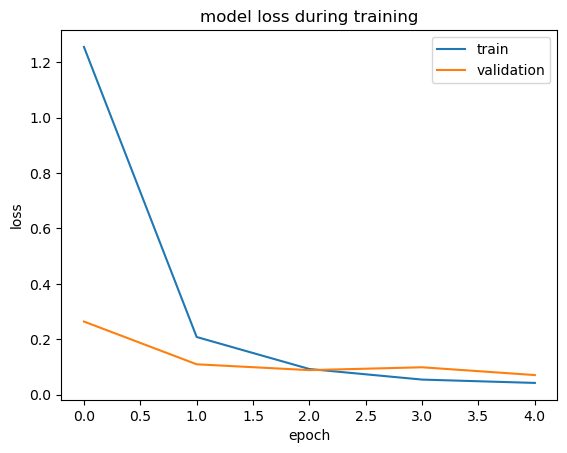

In [74]:
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss during training')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.savefig("model loss during training")
#plt.show()

**Accuracy plot during training**

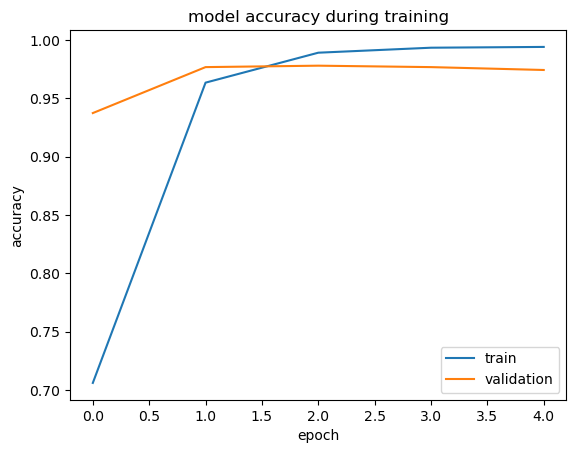

In [75]:
#Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy during training')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='lower right')
#plt.show()
plt.savefig("model accuracy during training")

**Using The Model For Inference**

In [105]:
test_labels = test_batches.classes

In [106]:
test_batches.class_indices

{'Acacia': 0,
 'Adenanthera microsperma': 1,
 'Adenium species': 2,
 'Anacardium occidentale': 3,
 'Annona squamosa': 4,
 'Artocarpus altilis': 5,
 'Artocarpus heterophyllus': 6,
 'Barringtonia acutangula': 7,
 'Cananga odorata': 8,
 'Carica papaya': 9,
 'Casuarina equisetifolia': 10,
 'Cedrus': 11,
 'Chrysophyllum cainino': 12,
 'Citrus aurantiifolia': 13,
 'Citrus grandis': 14,
 'Cocos nucifera': 15,
 'Dalbergia oliveri': 16,
 'Delonix regia': 17,
 'Dipterocarpus alatus': 18,
 'Erythrina fusca': 19,
 'Eucalyptus': 20,
 'Ficus microcarpa': 21,
 'Ficus racemosa': 22,
 'Gmelina arborea Roxb': 23,
 'Hevea brasiliensis': 24,
 'Hopea': 25,
 'Khaya senegalensis': 26,
 'Khaya senegalensis A.Juss': 27,
 'Lagerstroemia speciosa': 28,
 'Magnolia alba': 29,
 'Mangifera': 30,
 'Melaleuca': 31,
 'Melia azedarach': 32,
 'Musa': 33,
 'Nephelium lappaceum': 34,
 'Persea': 35,
 'Polyalthia longifolia': 36,
 'Prunnus': 37,
 'Prunus salicina': 38,
 'Psidium guajava': 39,
 'Pterocarpus macrocarpus': 40,


In [78]:
#We use model.predict() to run the predictions

In [79]:
predictions = model.predict(x=test_batches, steps=len(test_batches),verbose=0)

**creating a confusion_matrix**

In [80]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [81]:
print('Comfusion matrix:\n',cm)

Comfusion matrix:
 [[6 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 8 ... 0 0 0]
 ...
 [0 0 0 ... 9 0 0]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 5]]


**Heatmap**

<AxesSubplot:>

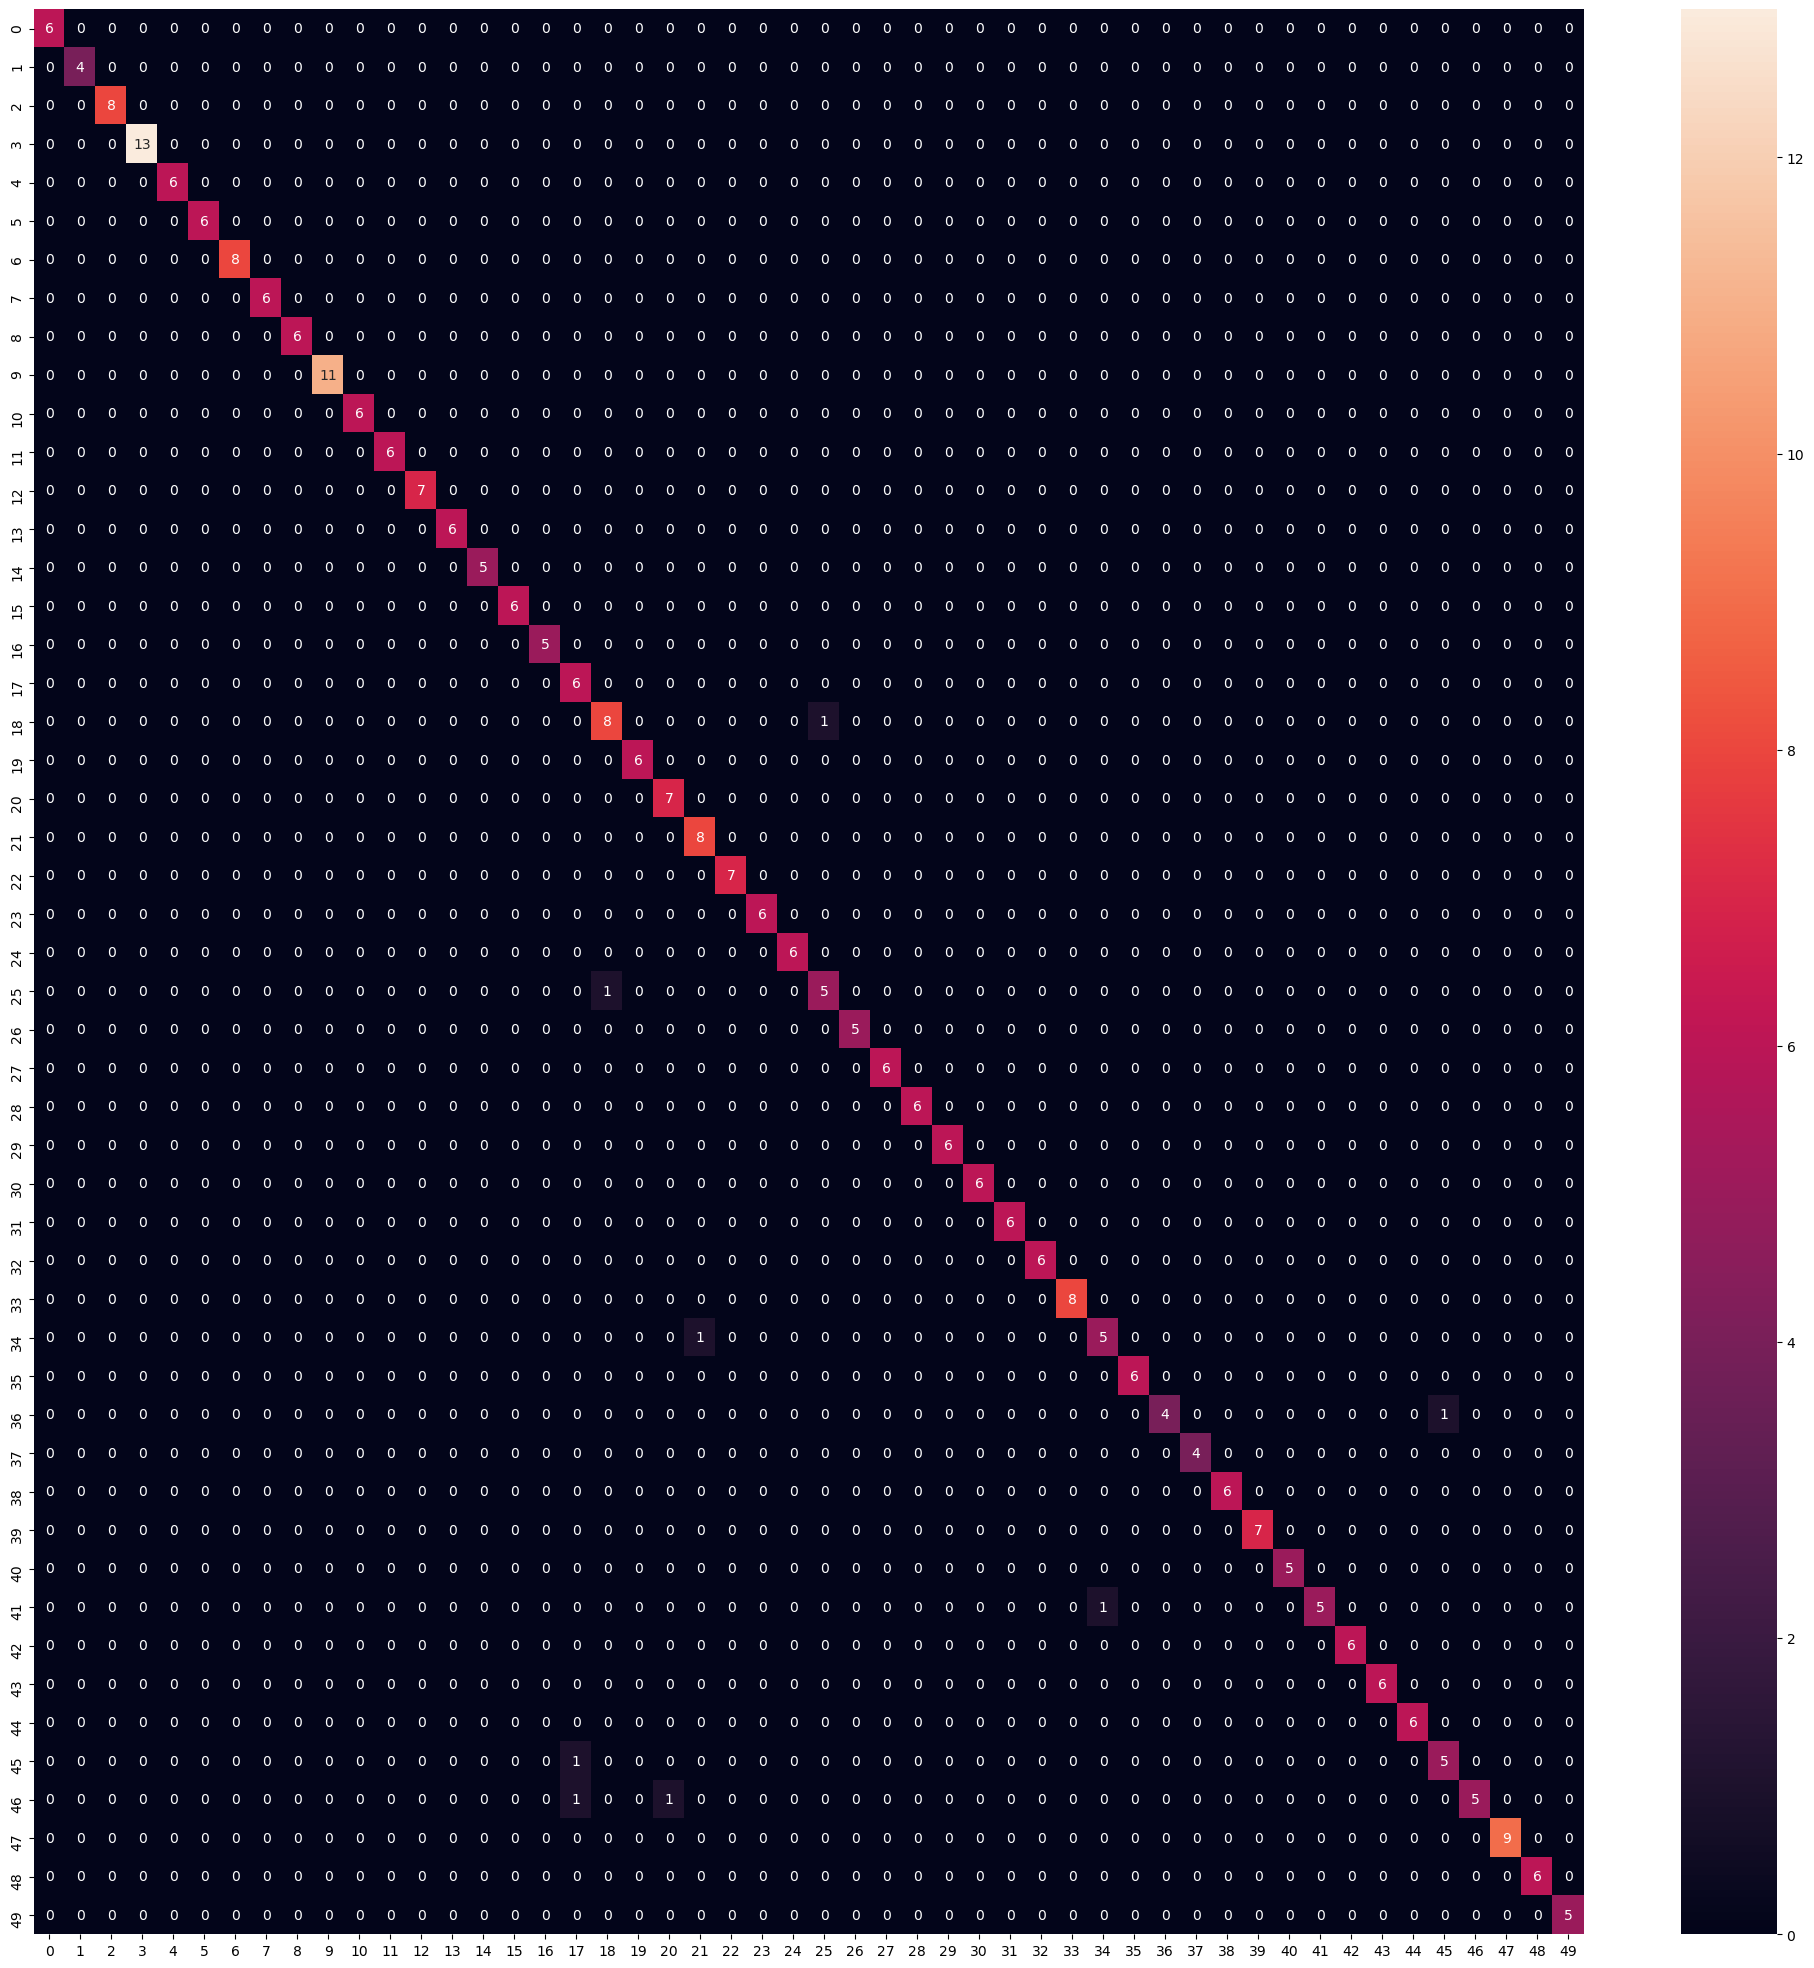

In [82]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(cm, annot=True)

**Classification Report**

In [83]:
from sklearn.metrics import classification_report

In [84]:
print(classification_report(y_true=test_labels, y_pred=predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         6
          16       1.00      1.00      1.00         5
          17       0.75    

In [95]:
# Test Accuarcy is 98 %.
# Our model is performing very well on test data.
# Values of precision and recall is 100% for almost for all class.

**Save the New MobileNet model**

In [96]:
model.save('Bark_texure_cls_MobileNet_model.h5') # Save model 

**Let's Check the performance of model on Unseen data**

In [97]:
#displaying unseen image file which is going to be tested on new MobileNet_model

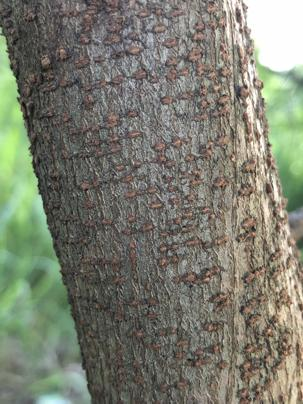

In [98]:
from IPython.display import Image
Image(filename=r'C:/Users/abcd/Desktop/TMLC/MobileNet_sample_images/IMG_6362.JPG') 

**Let's see whether the our model classify above image correctly or not**

In [99]:
def load_image(img_path):
    img = image.load_img(img_path ,target_size=(224, 224))  # Accepts the image file and target_size for image
    img_array = image.img_to_array(img)                            # Convert images into array
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)    # expands the dimensions (4D)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims) #preprocesses the given image data to be in the same format as the images that MobileNet was originally trained on.

In [100]:
#load_image() that accepts an image path, and processes the image to get it in a format that the model expects.

In [101]:
#preprocess_input() from tf.keras.applications.mobilenet, which preprocesses the given image data to be in the same format as the images that MobileNet was originally trained on. Specifically, it's scaling the pixel values in the image between -1 and 1, and this function will return the preprocessed image data as a numpy array.

**Predicting with new MobileNet model**

In [102]:
#Load model
MobileNet_model = keras.models.load_model('Bark_texure_cls_MobileNet_model.h5')

In [103]:
img_path = r'C:/Users/abcd/Desktop/TMLC/MobileNet_sample_images/IMG_6362.JPG'
preprocessed_image = load_image(img_path)
predictions = MobileNet_model.predict(preprocessed_image)

In [104]:
print('Predicted bark texture is belongs to class:',np.argmax(predictions)) #classifying correctly as 0

Predicted bark texture is belongs to class: 0


**Our trained MobileNet_model on custom datset is performing well on both test data as well as unseen data**